# Observations

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

In [158]:
df = pd.read_csv("Dataset/ultimate_college_championship.csv")
df.head()

,player,level,gender,division,team_name,Turns,Ds,Assists,Points,plus_minus,team_games,turns_per_game,ds_per_game,ast_per_game,pts_per_game,pls_mns_per_game
0,Jacques Nissen,Division 1,Men,Division 1 Men,Brown Brownian Motion,12,8,38,13,47,8,1.500000,1.000000,4.750000,1.625000,5.875
1,Cal Nightingale,Division 1,Men,Division 1 Men,Brown Brownian Motion,3,0,12,27,36,8,0.375000,0.000000,1.500000,3.375000,4.500
2,Faye Burdick,Division 1,Women,Division 1 Women,Colorado Quandary,6,12,16,13,35,7,0.857143,1.714286,2.285714,1.857143,5.000
3,Matthew Gregor,Division 3,Men,Division 3 Men,Franciscan Fatal,2,6,3,26,33,6,0.333333,1.000000,0.500000,4.333333,5.500
4,Frankie Saraniti,Division 3,Women,Division 3 Women,Carleton Eclipse,11,15,12,17,33,6,1.833333,2.500000,2.000000,2.833333,5.500


In [159]:
df_male = df[df['gender'] == 'Men']
df_female = df[df['gender'] == 'Women']
team_divs = df[['team_name', 'level','gender']].drop_duplicates().set_index(keys='team_name')

In [160]:
# Function to sort database by teams, giving the mean performance of the team
def make_teams(df):
    team = df.groupby('team_name').mean(numeric_only=True)
    team = team.join(team_divs)
    team = team.drop(columns='team_games')
    return team, team[team['level'] == 'Division 1'], team[team['level'] == 'Division 3']

In [161]:
# Box plot for teams
def make_boxplot(df):
    columns = df.iloc[:, 0:10].columns.tolist()
    plt.figure(figsize=(10,7))
    plt.title(f"Box Plot of {df['gender'][0]} {df['level'][0]}")
    df.boxplot(column=columns)
    plt.xticks(rotation=45)
    plt.show()

In [162]:
all_male, div1_male, div3_male = make_teams(df_male)

/var/folders/f4/jj9s9qy16sl2w2ltwtbkxhs80000gn/T/ipykernel_60877/2012195075.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"Box Plot of {df['gender'][0]} {df['level'][0]}")


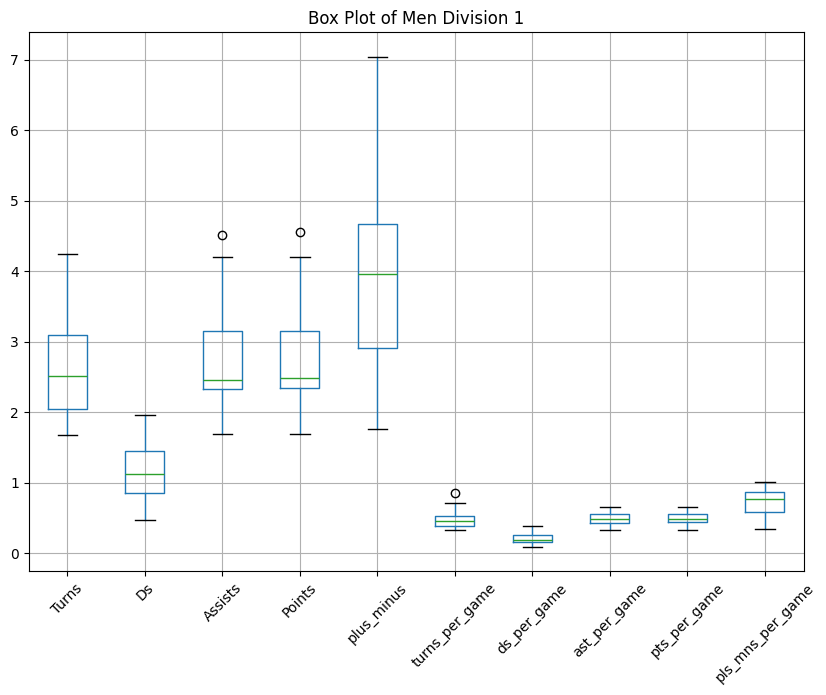

/var/folders/f4/jj9s9qy16sl2w2ltwtbkxhs80000gn/T/ipykernel_60877/2012195075.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"Box Plot of {df['gender'][0]} {df['level'][0]}")


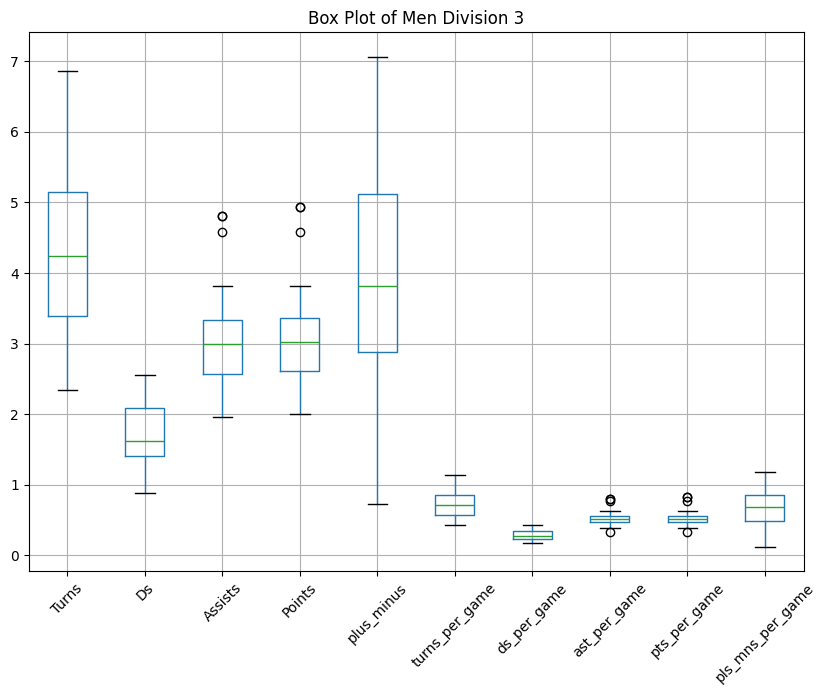

In [163]:
make_boxplot(div1_male)
make_boxplot(div3_male)

From observation, we can see that although div 3 teams' plus_minus is higher on average, their number of turnovers are greater. The data shows from these specific values that there is a performance difference between a div 1 team and div 3 team.

/var/folders/f4/jj9s9qy16sl2w2ltwtbkxhs80000gn/T/ipykernel_60877/2012195075.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"Box Plot of {df['gender'][0]} {df['level'][0]}")


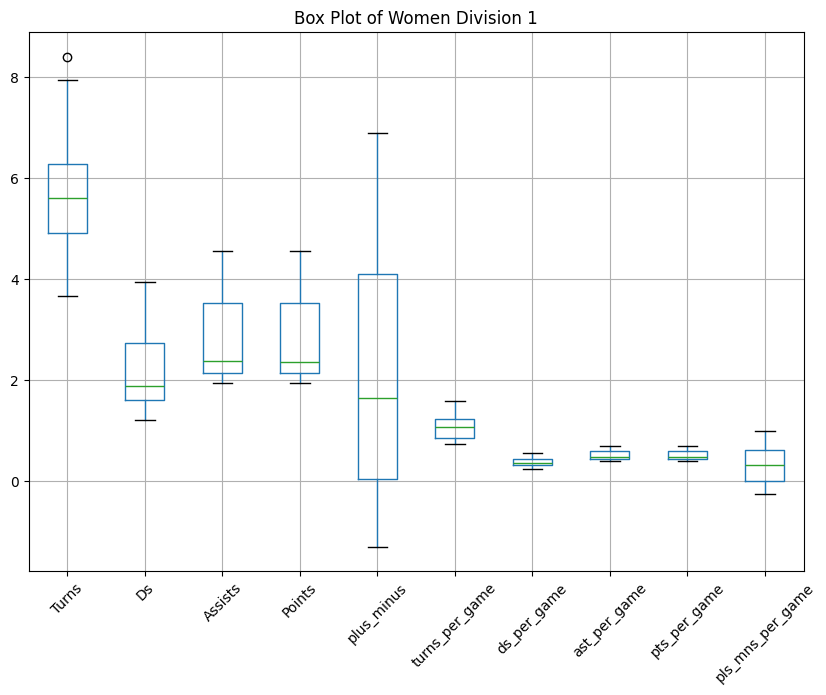

/var/folders/f4/jj9s9qy16sl2w2ltwtbkxhs80000gn/T/ipykernel_60877/2012195075.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"Box Plot of {df['gender'][0]} {df['level'][0]}")


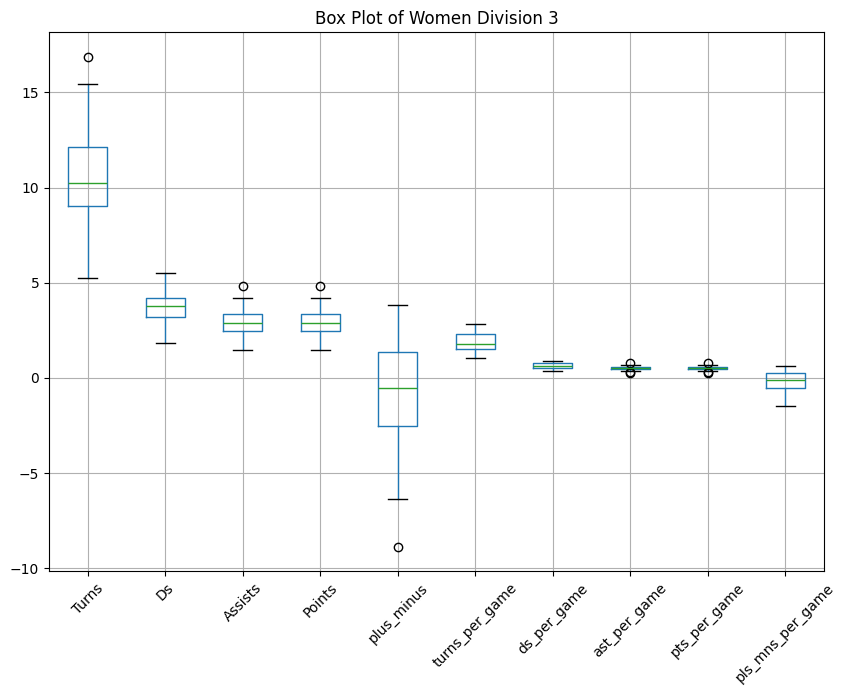

In [165]:
# Plotting Female Teams
all_female, div1_female, div3_female = make_teams(df_female)
make_boxplot(div1_female)
make_boxplot(div3_female)

We see a similar result for the female teams